In [1]:
import pandas as pd
import scipy as sp
import scipy.io as sio
import numpy as np
from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.utils import shuffle 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = sio.loadmat('data_xvector_embeddings.mat')

In [3]:
#from os import listdir
#from os.path import isfile, join
#path = "/home/fatima/Documents/project/LDC2019E31_Second_DIHARD_Challenge_Development_Data/data/single_channel/flac/"
#onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
#print(onlyfiles)

##save the list into frame file 



In [4]:
#data

In [5]:
list_labels =[] 
list_file_names=[]
for i in data["labels"]:
    if i == 1 : 
        list_labels.append("audiobooks")
    if i ==2: 
        list_labels.append("broadcast_interview")
    if i ==3:
        list_labels.append("child")
    if i ==4:
        list_labels.append("clinical")
    if i == 5:
        list_labels.append("court")
    if i ==6:
        list_labels.append("maptask")
    if i ==7:
        list_labels.append("meeting")
    if i ==8:
        list_labels.append("restaurant")
    if i ==9:
        list_labels.append("socio_field")
    if i ==10:
        list_labels.append("socio_lab")
    if i ==11:
        list_labels.append("webvideo")

In [6]:
data["label_name"] = list_labels
#data["files_names"] = onlyfiles

In [7]:
# add names of files
list_file_names = ['DH_000'+str(i) for i in range(1,10)]
list_file_names += ['DH_00'+str(i) for i in range(10,100)]
list_file_names += ['DH_0'+str(i) for i in range(100,193)]
print(list_file_names)

data['file_name'] = list_file_names


['DH_0001', 'DH_0002', 'DH_0003', 'DH_0004', 'DH_0005', 'DH_0006', 'DH_0007', 'DH_0008', 'DH_0009', 'DH_0010', 'DH_0011', 'DH_0012', 'DH_0013', 'DH_0014', 'DH_0015', 'DH_0016', 'DH_0017', 'DH_0018', 'DH_0019', 'DH_0020', 'DH_0021', 'DH_0022', 'DH_0023', 'DH_0024', 'DH_0025', 'DH_0026', 'DH_0027', 'DH_0028', 'DH_0029', 'DH_0030', 'DH_0031', 'DH_0032', 'DH_0033', 'DH_0034', 'DH_0035', 'DH_0036', 'DH_0037', 'DH_0038', 'DH_0039', 'DH_0040', 'DH_0041', 'DH_0042', 'DH_0043', 'DH_0044', 'DH_0045', 'DH_0046', 'DH_0047', 'DH_0048', 'DH_0049', 'DH_0050', 'DH_0051', 'DH_0052', 'DH_0053', 'DH_0054', 'DH_0055', 'DH_0056', 'DH_0057', 'DH_0058', 'DH_0059', 'DH_0060', 'DH_0061', 'DH_0062', 'DH_0063', 'DH_0064', 'DH_0065', 'DH_0066', 'DH_0067', 'DH_0068', 'DH_0069', 'DH_0070', 'DH_0071', 'DH_0072', 'DH_0073', 'DH_0074', 'DH_0075', 'DH_0076', 'DH_0077', 'DH_0078', 'DH_0079', 'DH_0080', 'DH_0081', 'DH_0082', 'DH_0083', 'DH_0084', 'DH_0085', 'DH_0086', 'DH_0087', 'DH_0088', 'DH_0089', 'DH_0090', 'DH_0091'

In [8]:
list1 = data["devIVs"].transpose()

In [9]:
list1 = list1.tolist()

In [10]:
data2 = pd.DataFrame()

In [11]:
data2["devIVs"] =list1
data2["label_name"] = data["label_name"]
data2["label_number"] = data["labels"]
data2['file_name'] = data['file_name']

In [12]:
data2

,devIVs,label_name,label_number,file_name
0,"[-1.797777, 0.06394109, 0.6110049, 2.059658, -...",audiobooks,1,DH_0001
1,"[-2.321903, 0.8769827, -0.172986, -0.6560634, ...",audiobooks,1,DH_0002
2,"[-1.761098, 2.489063, 1.281954, -0.629913, 0.9...",audiobooks,1,DH_0003
3,"[-1.413769, 1.598151, 2.860205, -1.543402, 0.8...",audiobooks,1,DH_0004
4,"[-1.627785, 0.931557, 2.019412, -1.43913, 1.02...",audiobooks,1,DH_0005
...,...,...,...,...
187,"[-1.648024, -0.2932833, -1.557863, -0.4835897,...",broadcast_interview,2,DH_0188
188,"[-1.949884, 0.1879981, -2.155498, -0.01495025,...",broadcast_interview,2,DH_0189
189,"[-0.921178, 0.5528077, -0.2506203, -0.2570134,...",broadcast_interview,2,DH_0190
190,"[-1.600282, 0.3360161, -2.174027, 0.6307677, -...",broadcast_interview,2,DH_0191


# Shuffle the data 


In [15]:
data2= shuffle(data2)
data2

,devIVs,label_name,label_number,file_name
68,"[-0.03788677, -1.099831, 1.215751, -1.0123, 1....",clinical,4,DH_0069
123,"[0.2626885, 0.02762941, 0.5348678, -0.6829667,...",socio_field,9,DH_0124
1,"[-2.321903, 0.8769827, -0.172986, -0.6560634, ...",audiobooks,1,DH_0002
141,"[-0.7906228, -0.2707422, 1.632167, -0.9735222,...",socio_lab,10,DH_0142
69,"[-0.2824319, 0.1574873, 1.373219, -0.1828858, ...",clinical,4,DH_0070
...,...,...,...,...
60,"[0.2214981, -0.5542677, 1.367889, -1.400998, 1...",clinical,4,DH_0061
26,"[0.9866852, -1.439386, 0.5157065, -1.208288, 0...",child,3,DH_0027
135,"[-0.7713378, -1.893072, 0.6704347, -0.5193504,...",socio_lab,10,DH_0136
40,"[0.01421043, -0.9484777, 1.017856, -1.111484, ...",restaurant,8,DH_0041


In [19]:
numpy_array = np.array(data2['devIVs'])
Vec =  numpy_array.transpose().tolist()



### Training a k-means clustering model 

In [20]:
max1 = 0
max2= 0
cluster = 0
for i in range(2,11) :
    # YOUR CODE HERE
        from sklearn.cluster import KMeans
        from sklearn.preprocessing import StandardScaler
        from sklearn import metrics

        # Create a KMeans clustering object
        km = KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=10000,
            n_clusters=i, n_init=13, n_jobs=None, precompute_distances='auto',
            random_state=0, tol=0.0001, verbose=0)
        #remove it 
        #X_std = StandardScaler().fit_transform(X)
        km.fit(Vec)

        # Print out the predicted labels
        predicted_labels = km.labels_

        clusters = predicted_labels.tolist()

        centroids  = km.cluster_centers_  #means of shape [10,] 

        centroid_labels = [centroids[i] for i in predicted_labels]
        HS  = metrics.homogeneity_score(data2["label_name"], predicted_labels)
        CS = metrics.completeness_score(data2["label_name"], predicted_labels)
        print("When K is ",i,"HS is ",HS, "CS is ",CS)
        
    
              

When K is  2 HS is  0.11694285353538686 CS is  0.40751641967548635
When K is  3 HS is  0.19184461174703019 CS is  0.40831592594753746
When K is  4 HS is  0.2962989025906433 CS is  0.5250375688314597
When K is  5 HS is  0.3504366085016442 CS is  0.5195994809072627
When K is  6 HS is  0.33238474361955905 CS is  0.45025705967729795
When K is  7 HS is  0.36501140074293603 CS is  0.4624904503630583
When K is  8 HS is  0.42062932641125234 CS is  0.510206843442746
When K is  9 HS is  0.4471037097923127 CS is  0.503417520460658
When K is  10 HS is  0.48180628897857775 CS is  0.5244723434143325


In [169]:
centroids

array([[ 0.20131618, -0.80676864,  1.02945552, ..., -1.03759929,
         1.85851427, -0.65453838],
       [-0.31311485, -0.77873984, -0.13318187, ..., -0.85344776,
         1.37415241, -0.64337436],
       [-1.27561336,  0.30998491,  1.40425358, ..., -1.03112373,
         0.88647275,  0.13305324],
       [-1.51783956,  0.03480961, -1.35422364, ..., -0.92046311,
         1.9074118 ,  0.01388579]])

In [229]:
predicted_labels
data2['predicted_labels'] =predicted_labels

/home/fatima/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [207]:

group_clusters = data2.groupby("predicted_labels")
cluster0_files = group_clusters.get_group(0)
cluster1_files = group_clusters.get_group(1)
cluster2_files = group_clusters.get_group(2)
cluster3_files = group_clusters.get_group(3)

cluster0_files

,devIVs,label_name,label_number,file_name,predicted_labels
106,"[-0.04693745, -1.394134, -0.491, -0.9296801, -...",meeting,7,DH_0107,0
36,"[-0.1239568, -1.707674, -0.1074273, -0.87576, ...",restaurant,8,DH_0037,0
131,"[-0.08950377, 0.8528235, 0.5079927, -0.2985378...",socio_field,9,DH_0132,0
159,"[0.3935552, -0.4504562, 0.8053226, -0.265129, ...",webvideo,11,DH_0160,0
145,"[-1.194961, -1.130212, 0.5437562, -0.2198831, ...",socio_lab,10,DH_0146,0
112,"[-0.009547558, -0.7987682, 0.236666, -0.491749...",meeting,7,DH_0113,0
163,"[-0.1521062, -0.9281094, 0.5132736, -1.090796,...",webvideo,11,DH_0164,0
46,"[0.7179798, -0.9420102, -0.6498251, -1.064786,...",restaurant,8,DH_0047,0
158,"[0.01077373, -0.9981456, -0.4428662, -1.403625...",webvideo,11,DH_0159,0
173,"[1.209626, -0.1389957, 0.1272503, -0.3385379, ...",webvideo,11,DH_0174,0


# Save the clusters in a CSV file 

In [208]:
import csv


In [209]:
cluster0_files.to_csv('cluster0_files.csv')
cluster1_files.to_csv('cluster1_files.csv')
cluster2_files.to_csv('cluster2_files.csv')
cluster3_files.to_csv('cluster3_files.csv')


### plot the clusters 

In [210]:
from sklearn.manifold import TSNE

In [211]:
model = TSNE(n_components = 2,random_state = 0)

In [212]:
tsne_data = model.fit_transform(Vec)

In [213]:
tsne_data.shape

(192, 2)

In [214]:
#tsne_data


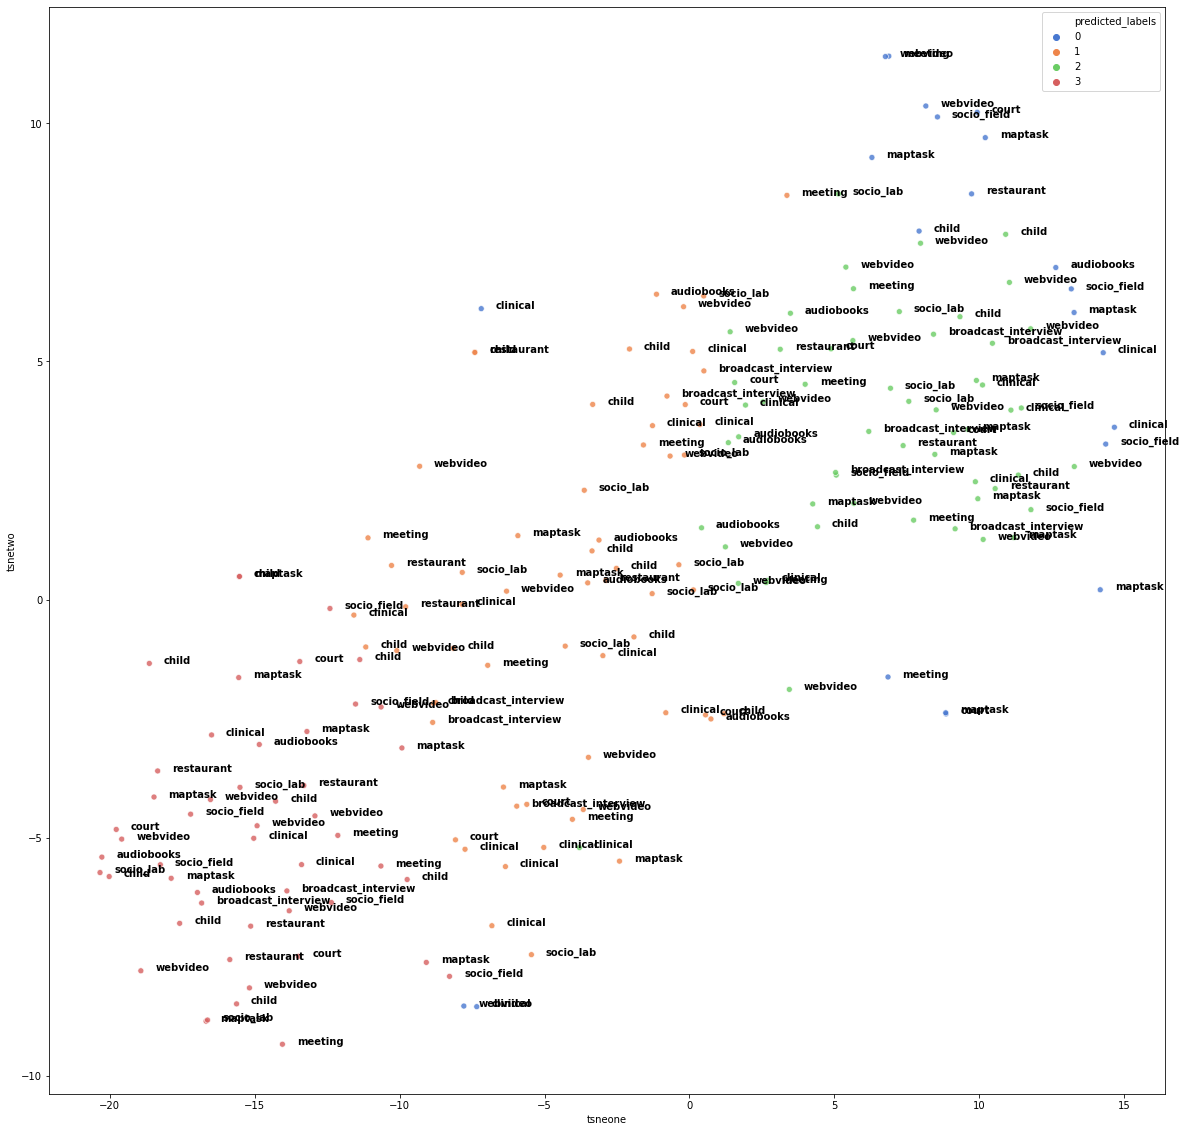

In [215]:
plt.figure(figsize=(20,20))
p1 = sns.scatterplot(
    x="tsneone", y="tsnetwo",
    hue="predicted_labels",
    palette=sns.color_palette("muted", 4),
    data=df_subset,
    legend="full",
    alpha=0.8
)
for line in range(0,df_subset.shape[0]):
     p1.text(df_subset.tsneone[line]+0.5, df_subset.tsnetwo[line], df_subset.labels[line], horizontalalignment='left', size='medium', color='black', weight='semibold')


In [230]:
labels_true = data2["label_number"]
labels_pred=  data2["predicted_labels"]

In [233]:
data2

,devIVs,label_name,label_number,file_name,predicted_labels
47,"[-0.4908188, 0.2308626, 1.538499, -0.8235094, ...",clinical,4,DH_0048,0
69,"[-0.2824319, 0.1574873, 1.373219, -0.1828858, ...",clinical,4,DH_0070,0
126,"[0.1245805, 0.3287757, -0.860019, -0.06903419,...",socio_field,9,DH_0127,3
63,"[0.3515872, -0.8156043, 1.347744, -0.8241565, ...",clinical,4,DH_0064,0
80,"[-1.18076, -0.4419416, 1.259954, -0.8870569, 0...",court,5,DH_0081,2
...,...,...,...,...,...
34,"[-0.09271277, -1.425918, -0.3512533, -1.183753...",child,3,DH_0035,0
27,"[0.2061043, -1.049599, 0.7532375, -1.436297, 0...",child,3,DH_0028,0
115,"[-1.925402, -0.9391472, -1.026592, 0.07378843,...",meeting,7,DH_0116,3
99,"[0.04061494, 0.1562157, -1.688015, 1.254151, -...",maptask,6,DH_0100,1


### Evaluate the model 


homogeneity: each cluster contains only members of a single class.

completeness: all members of a given class are assigned to the same cluster.

In [231]:
from sklearn import metrics
metrics.homogeneity_score(labels_true, labels_pred)


0.2991000336310425

In [232]:
metrics.completeness_score(labels_true, labels_pred)

0.5301511101706369